# Code Example from Time Series Talk: Autocorrelation (ACF) and Partial Autocorrelation (PACF)

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Ice Cream Production Data

### Parsing and Preprocessing

In [7]:
# Read data as CSV
df_ice_cream = pd.read_csv('data/ice_cream.csv')

In [8]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [9]:
# Rename columns
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [10]:
df_ice_cream['date']  = pd.to_datetime(df_ice_cream['date'])

In [11]:
df_ice_cream.set_index('date', inplace=True)

In [12]:
# Just take data from 2010 on
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

### Visualization

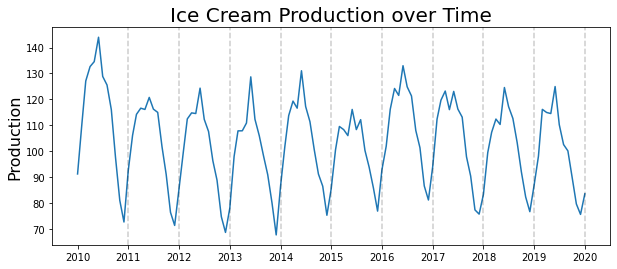

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### ACF and PACF

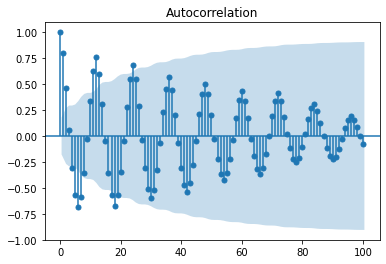

In [14]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

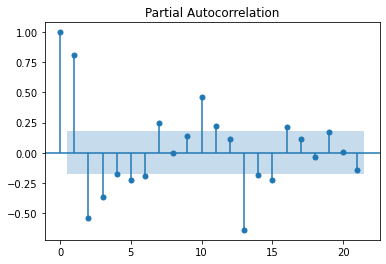

In [15]:
pacf_plot = plot_pacf(df_ice_cream.production)

Based on the plots, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13.

## Stock Data

### Parsing and Preprocessing

In [19]:
# Get historical data for the defined ticker (SPDR S&P 500)
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2015-01-01', end='2020-01-01')

In [20]:
tickerDf = tickerDf[['Close']]

In [21]:
tickerDf.head()

,Close
Date,
2014-12-31,180.439178
2015-01-02,180.342636
2015-01-05,177.085739
2015-01-06,175.417770
2015-01-07,177.603714


### Visualization

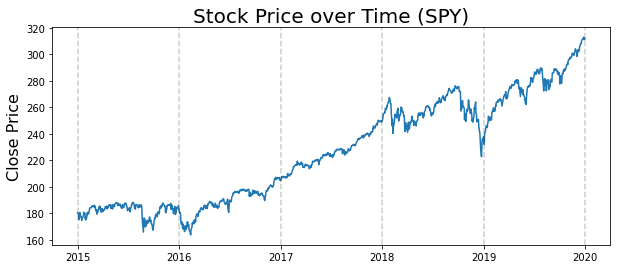

In [23]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (SPY)', fontsize=20)
plt.ylabel('Close Price', fontsize=16)
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [31]:
# The Close prices are not stationary --> take the first differences
# tickerDf.Close.values[1:] are all prices from tomorrow on
# tickerDf.Close.values[:-1]tickerDf.Close.values[:-1] are all prices starting today except for the first one
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [32]:
tickerDf['FirstDifference'] = first_diffs

In [33]:
tickerDf.head()

,Close,FirstDifference
Date,,
2014-12-31,180.439178,-0.096542
2015-01-02,180.342636,-3.256897
2015-01-05,177.085739,-1.667969
2015-01-06,175.417770,2.185944
2015-01-07,177.603714,3.151550


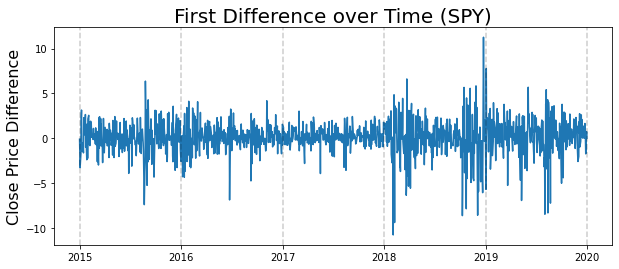

In [35]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (SPY)', fontsize=20)
plt.ylabel('Close Price Difference', fontsize=16)
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### ACF and PACF

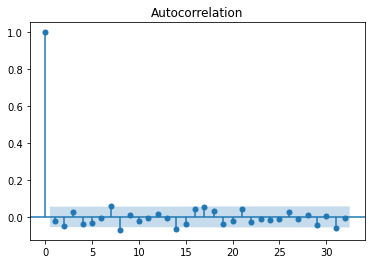

In [36]:
acf_plot = plot_acf(tickerDf.FirstDifference)

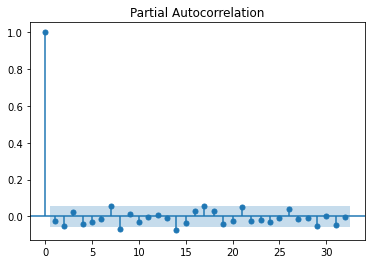

In [37]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

Neither ACF nor PACF are really informative.